In [108]:
with open('input.txt', 'r') as f:
    puzzle = f.read().strip('\n')

In [109]:
example = """     |          
     |  +--+    
     A  |  C    
 F---|----E|--+ 
     |  |  |  D 
     +B-+  +--+ """

In [110]:
import numpy as np

In [111]:
class Maze:
    
    def __init__(self, s):
        self.maze = np.array([list(line) for line in s.split('\n')])
    
    def __getitem__(self, i):
        H, W = self.maze.shape
        if 0 <= i[0] < H and 0 <= i[1] < W:
            return self.maze[i[0], i[1]]
        else:
            return ' '
    
    def start(self):
        i = 0 
        j = list(self.maze[0]).index('|')
        return np.array([i,j])



In [118]:
%matplotlib inline

In [166]:
def navigate(maze, verbose=False):
    down = np.array([1,0])
    right = np.array([0,1])
    
    maze = Maze(maze)

    position = maze.start()
    direction = down

    breadcrumbs = []
    history = []
    steps = 0
    while maze[position] != ' ':
        steps += 1
        if verbose:
            history.append(list(position))
            if len(history) % 1000 == 0:
                plt.figure()
                x, y = np.array(history).T
                plt.plot(x,y)
                plt.plot(x[-1000:], y[-1000:])
                plt.show()
#         print(maze[position], position, direction)
        if maze[position] == '+':
            for new_direction in [down, -down, right, -right]:
                if maze[position+new_direction] != ' ' and np.all(new_direction != -direction):
                    direction = new_direction
                    break
        else:
            if maze[position] not in '|-':
                breadcrumbs.append(maze[position])
        position += direction
#         print(position, direction)
        
    return ''.join(breadcrumbs), steps

In [167]:
navigate(example)

('ABCDEF', 38)

In [168]:
navigate(puzzle)

('RYLONKEWB', 16016)

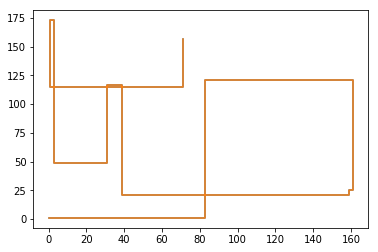

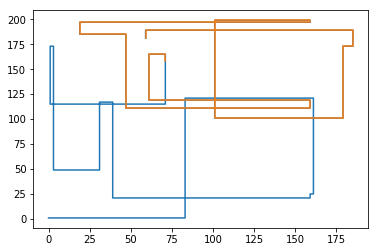

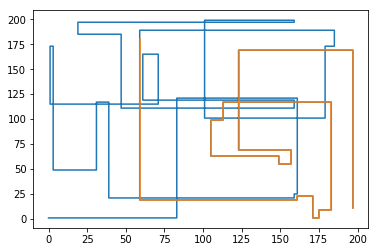

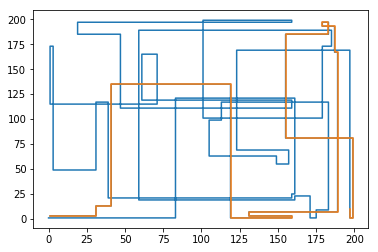

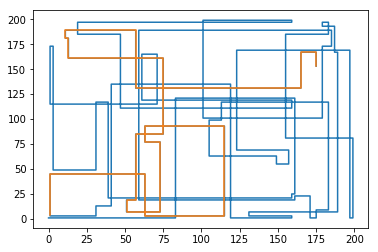

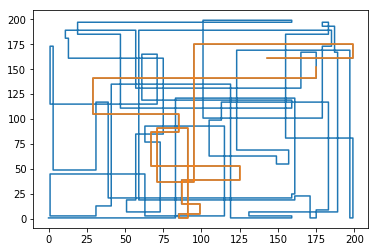

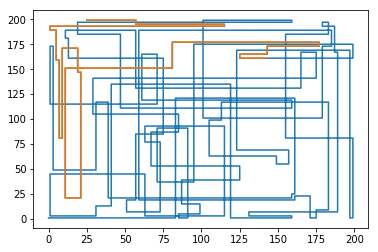

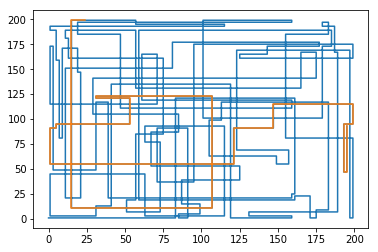

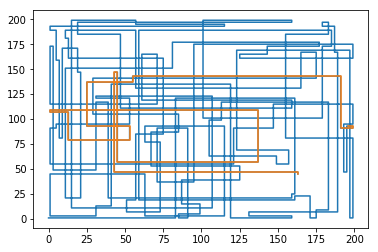

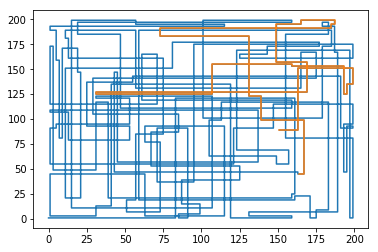

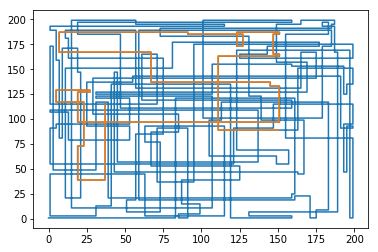

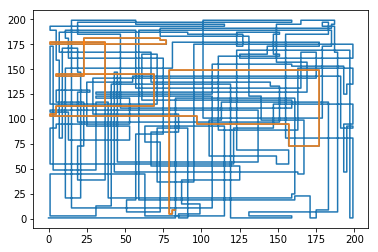

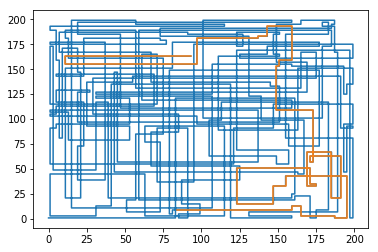

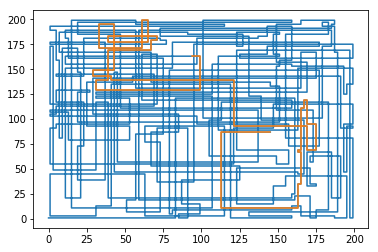

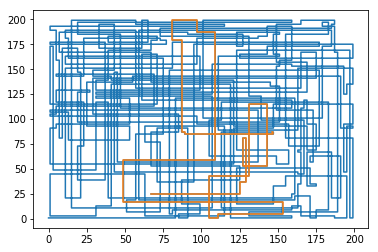

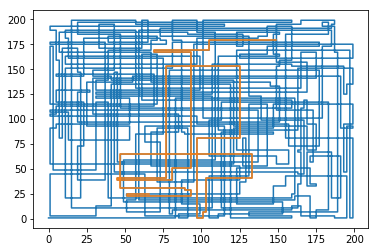

('RYLONKEWB', 16016)

In [169]:
navigate(puzzle, verbose=True)

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [250]:
def navigate_animation(maze, step, line):
    down = np.array([1,0])
    right = np.array([0,1])
    
    maze = Maze(maze)

    position = maze.start()
    direction = down

    breadcrumbs = []
    history = []
    steps = 0
    while maze[position] != ' ':
        steps += 1
        history.append(list(position))
        if len(history) % step == 0:
            x, y = np.array(history).T
            line.set_data(x,y)
            yield line,
#         print(maze[position], position, direction)
        if maze[position] == '+':
            for new_direction in [down, -down, right, -right]:
                if maze[position+new_direction] != ' ' and np.all(new_direction != -direction):
                    direction = new_direction
                    break
        else:
            if maze[position] not in '|-':
                breadcrumbs.append(maze[position])
        position += direction
#         print(position, direction)
        
    return
# ''.join(breadcrumbs), steps

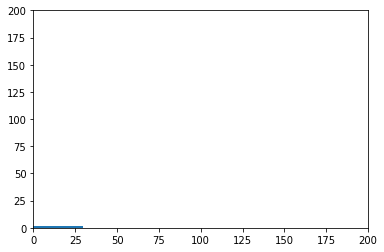

In [253]:
fig, ax = plt.subplots()
ax.set_xlim(( 0, 200))
ax.set_ylim(( 0, 200))
ln, = ax.plot([], [], lw=2)
gen = navigate_animation(puzzle,30,ln) 

def update(frame):
    for frame in gen:
        return frame
    return frame

ani = FuncAnimation(fig, update, frames=500, interval=20, blit=True)

In [255]:
from IPython.display import HTML

HTML(ani.to_html5_video())